# SARIMA. Individual hometask
### Kirill Zakharov

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
%matplotlib inline
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('6_TGE_USA.csv', index_col='Month', parse_dates=True)
data.index = pd.DatetimeIndex(data.index, freq='MS')
data.columns = ['TGE_USA']
data.head(4)

,TGE_USA
Month,
1985-01-01,227.86
1985-02-01,198.24
1985-03-01,194.97
1985-04-01,184.88


In [3]:
data_t, lmbda = boxcox(data['TGE_USA'])
y_transformation = pd.DataFrame(data['TGE_USA'].values, columns=['initial'])
y_transformation['transformed'] = data_t
y_transformation['seasonal_diff'] = y_transformation['transformed'].diff(12)
y_transformation['lag1_diff'] = y_transformation['seasonal_diff'].diff(1)

In [7]:
y_transformation.head(4)

,initial,transformed,seasonal_diff,lag1_diff
0,227.86,1.017514,NaN,NaN
1,198.24,1.016775,NaN,NaN
2,194.97,1.016680,NaN,NaN
3,184.88,1.016366,NaN,NaN


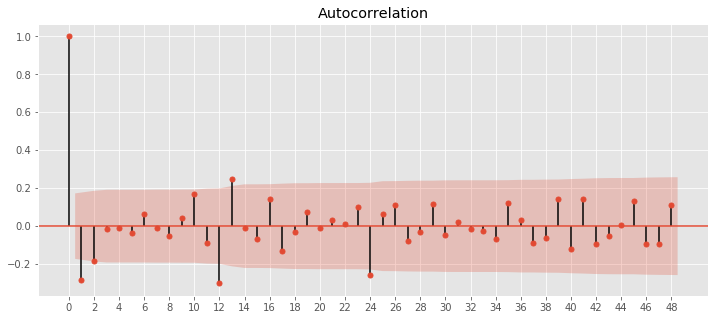

In [8]:
plt.rcParams['figure.figsize'] = (12,5)
plot_acf(y_transformation['lag1_diff'].dropna(), lags=48)
plt.xticks(np.arange(0, 50, 2))
plt.show()

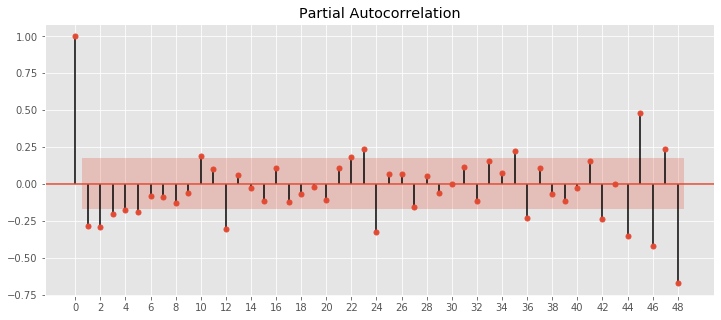

In [9]:
plt.rcParams['figure.figsize'] = (12,5)
plot_pacf(y_transformation['lag1_diff'].dropna(), lags=48)
plt.xticks(np.arange(0, 50, 2))
plt.show()

In [34]:
model = SARIMAX(y_transformation['initial'], 
                order=(4, 1, 2), 
                seasonal_order=(4, 1, 1, 12)).fit()

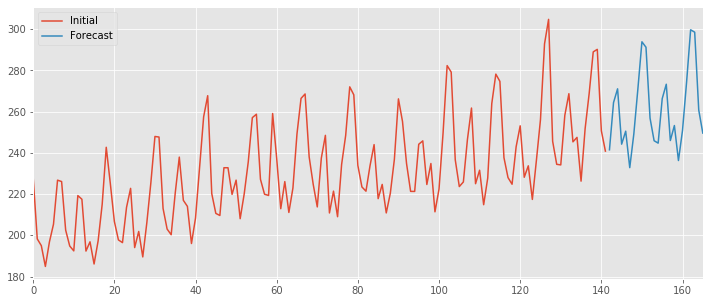

In [35]:
y_transformation['initial'].plot(figsize=(12,5))
model.forecast(24).plot()
plt.legend(['Initial', 'Forecast'])
plt.show()